<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/%EA%B9%80%EC%A7%84%EA%B7%BC/%EC%98%A4%ED%86%A0%EC%97%A0%EC%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import autokeras as ak

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,6,0.355,2.24,-20
1,2011.3.7 18:29,6,0.352,2.24,-20
2,2011.3.8 6:29,6,0.351,2.24,-20
3,2011.3.8 18:29,6,0.353,2.24,-20
4,2011.3.9 6:29,6,0.352,2.24,-20
...,...,...,...,...,...
251,2011.8.30 5:28,6,0.646,2.27,-20
252,2011.8.30 17:28,6,0.649,2.27,-20
253,2011.8.31 5:28,6,0.650,2.27,-20
254,2011.8.31 16:09,6,0.655,2.27,-20


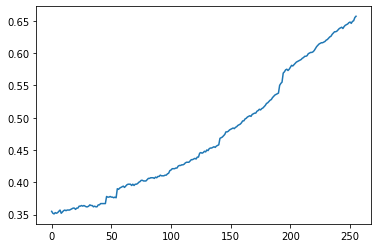

In [ ]:
df['Resistance'].plot()

In [ ]:
df = df[['Resistance', 'Volt', 'Temp']]
df

,Resistance,Volt,Temp
0,0.355,2.24,-20
1,0.352,2.24,-20
2,0.351,2.24,-20
3,0.353,2.24,-20
4,0.352,2.24,-20
...,...,...,...
251,0.646,2.27,-20
252,0.649,2.27,-20
253,0.650,2.27,-20
254,0.655,2.27,-20


In [ ]:
train_x_data = df[["Resistance","Volt", "Temp"]].astype("float64")
train_y_data = df[["Resistance"]].astype("float64")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x_data = scaler.fit_transform(train_x_data)
train_y_data = scaler.fit_transform(train_y_data)

In [ ]:
train_x_data, train_y_data

(array([[0.0130719 , 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.        , 0.25      , 0.        ],
        [0.00653595, 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.00653595, 0.25      , 0.        ],
        [0.0130719 , 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.00980392, 0.25      , 0.        ],
        [0.01633987, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01633987, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.02287582, 0.25      , 0.        ],
        [0.02614379, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0.        ],
        [0.02287582, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0

In [ ]:
len(train_x_data)

256

In [ ]:
predict_from = 0
predict_until = 20
lookback = 20
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    # predict_until=predict_until,
    max_trials=3,
    objective="val_loss",
)

INFO:tensorflow:Reloading Oracle from existing project ./time_series_forecaster/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./time_series_forecaster/oracle.json


INFO:tensorflow:Reloading Tuner from ./time_series_forecaster/tuner0.json


INFO:tensorflow:Reloading Tuner from ./time_series_forecaster/tuner0.json


In [ ]:
clf.fit(
    x=train_x_data,
    y=train_y_data,
    batch_size=1,
    epochs=100,
)

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/100
218/218 [==============================] - 11s 20ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 3/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 4/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 6/100
218/218 [==============================] - 5s 21ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 7/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 8/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 9/100
218/218 [==============================] - 4s 20ms/step - loss: 0.0063 - mean_squared_error

INFO:tensorflow:Assets written to: ./time_series_forecaster/best_model/assets


INFO:tensorflow:Assets written to: ./time_series_forecaster/best_model/assets


In [ ]:
testdata = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')
testdata

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,18,0.398,2.30,-20
1,2011.3.7 18:29,18,0.398,2.30,-20
2,2011.3.8 6:29,18,0.401,2.30,-20
3,2011.3.8 18:29,18,0.402,2.30,-20
4,2011.3.9 6:29,18,0.402,2.30,-20
...,...,...,...,...,...
247,2011.8.29 17:28,18,0.616,2.31,-20
248,2011.8.30 5:28,18,0.616,2.31,-20
249,2011.8.30 17:28,18,0.617,2.31,-20
250,2011.8.31 5:28,18,0.618,2.31,-20


In [ ]:
testdata = testdata[['Resistance', 'Volt', 'Temp']]
testdata

,Resistance,Volt,Temp
0,0.398,2.30,-20
1,0.398,2.30,-20
2,0.401,2.30,-20
3,0.402,2.30,-20
4,0.402,2.30,-20
...,...,...,...
247,0.616,2.31,-20
248,0.616,2.31,-20
249,0.617,2.31,-20
250,0.618,2.31,-20


In [ ]:
test_x_data = testdata[["Resistance", "Volt", "Temp"]].astype("float64")
test_y_data = testdata[["Resistance"]].astype("float64")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_x_data = scaler.fit_transform(test_x_data)
test_y_data = scaler.fit_transform(test_y_data)

In [ ]:
train_x_data, test_x_data

(array([[0.0130719 , 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.        , 0.25      , 0.        ],
        [0.00653595, 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.00653595, 0.25      , 0.        ],
        [0.0130719 , 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.00326797, 0.25      , 0.        ],
        [0.00980392, 0.25      , 0.        ],
        [0.01633987, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01633987, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.01960784, 0.25      , 0.        ],
        [0.02287582, 0.25      , 0.        ],
        [0.02614379, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0.        ],
        [0.02287582, 0.25      , 0.        ],
        [0.02941176, 0.25      , 0

In [ ]:
lengh = len(test_x_data)-20

In [ ]:
test_x_data_minus20 = test_x_data[:lengh]
test_y_data_minus20 = test_y_data[:lengh]

In [ ]:
len(test_y_data_minus20)

232

In [ ]:
test_x_data_minus20, test_y_data_minus20

(array([[0.        , 0.55555556, 0.        ],
        [0.        , 0.55555556, 0.        ],
        [0.01339286, 0.55555556, 0.        ],
        [0.01785714, 0.55555556, 0.        ],
        [0.01785714, 0.55555556, 0.        ],
        [0.01785714, 0.55555556, 0.        ],
        [0.02678571, 0.55555556, 0.        ],
        [0.03125   , 0.55555556, 0.        ],
        [0.03125   , 0.55555556, 0.        ],
        [0.03571429, 0.55555556, 0.        ],
        [0.04464286, 0.55555556, 0.        ],
        [0.04464286, 0.55555556, 0.        ],
        [0.04464286, 0.55555556, 0.        ],
        [0.04910714, 0.55555556, 0.        ],
        [0.05357143, 0.55555556, 0.        ],
        [0.04464286, 0.55555556, 0.        ],
        [0.04910714, 0.55555556, 0.        ],
        [0.05357143, 0.55555556, 0.        ],
        [0.05357143, 0.55555556, 0.        ],
        [0.05357143, 0.55555556, 0.        ],
        [0.0625    , 0.55555556, 0.        ],
        [0.0625    , 0.55555556, 0

In [ ]:
test_x_data_minus20 = pd.DataFrame(test_x_data_minus20)
test_y_data = pd.DataFrame(test_y_data)
train_x_data = pd.DataFrame(train_x_data)
print(type(test_x_data_minus20), type(train_x_data))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
concat_test_x_data = pd.concat([train_x_data, test_x_data_minus20])
concat_test_x_data

,0,1,2
0,0.013072,0.250000,0.0
1,0.003268,0.250000,0.0
2,0.000000,0.250000,0.0
3,0.006536,0.250000,0.0
4,0.003268,0.250000,0.0
...,...,...,...
227,0.915179,0.777778,0.0
228,0.915179,0.666667,0.0
229,0.915179,0.777778,0.0
230,0.924107,0.777778,0.0


In [ ]:
predictions = clf.predict(concat_test_x_data)
print(predictions.shape)

469/469 [==============================] - 2s 5ms/step
(213, 1)


In [ ]:
predictions

array([[0.07937043],
       [0.08059344],
       [0.08148918],
       [0.08203196],
       [0.08579043],
       [0.08890887],
       [0.09045205],
       [0.09100172],
       [0.09100442],
       [0.09227449],
       [0.09277739],
       [0.09258299],
       [0.09306823],
       [0.09569851],
       [0.09867173],
       [0.10181449],
       [0.10410336],
       [0.10635645],
       [0.1086729 ],
       [0.11109053],
       [0.11165473],
       [0.11141478],
       [0.11208531],
       [0.11413627],
       [0.11612396],
       [0.11881664],
       [0.12077457],
       [0.14002876],
       [0.15712442],
       [0.17111664],
       [0.18797377],
       [0.22070596],
       [0.2585188 ],
       [0.25476158],
       [0.24726422],
       [0.23924105],
       [0.25769597],
       [0.27597266],
       [0.29008776],
       [0.3009745 ],
       [0.30977786],
       [0.3163312 ],
       [0.3202853 ],
       [0.32412866],
       [0.32860112],
       [0.33305007],
       [0.33715373],
       [0.342

In [ ]:
label=test_y_data[20:].values.tolist()
label, test_y_data[20:]


([[0.06250000000000044],
  [0.06250000000000044],
  [0.06250000000000044],
  [0.09375000000000022],
  [0.09821428571428581],
  [0.09375000000000022],
  [0.08928571428571441],
  [0.08482142857142905],
  [0.09375000000000022],
  [0.08928571428571441],
  [0.08482142857142905],
  [0.08928571428571441],
  [0.10714285714285765],
  [0.11607142857142883],
  [0.12500000000000022],
  [0.12500000000000022],
  [0.12946428571428603],
  [0.13392857142857162],
  [0.13839285714285743],
  [0.12946428571428603],
  [0.12500000000000022],
  [0.12946428571428603],
  [0.13839285714285743],
  [0.14285714285714302],
  [0.15178571428571463],
  [0.15178571428571463],
  [0.25892857142857184],
  [0.26339285714285743],
  [0.267857142857143],
  [0.2812500000000002],
  [0.2812500000000002],
  [0.2812500000000002],
  [0.27678571428571463],
  [0.2812500000000002],
  [0.27678571428571463],
  [0.3839285714285714],
  [0.38839285714285743],
  [0.392857142857143],
  [0.39732142857142905],
  [0.4017857142857142],
  [0.40178

In [ ]:
pred = pd.DataFrame(predictions)
pred

,0
0,0.079370
1,0.080593
2,0.081489
3,0.082032
4,0.085790
...,...
208,0.577225
209,0.578094
210,0.578227
211,0.579145


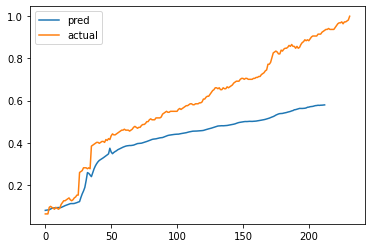

In [ ]:
plt.plot(pred, label='pred')
plt.plot(label, label='actual')
plt.legend()
plt.show()